# Demo 3

This notebook demonstrates the usage of the iCE-NGM package for a 2D limit state function given by:

$$g_3\left(x_1, x_2\right)=15-\left|x_1 x_2\right|$$

The reference failure probability is $6.20\times 10^{-8}$ and the number of failure modes is 4. This example is included in section 6.3 of our paper, which discusses two-dimensional examples. Further details can be found there.

## Initialization

In [5]:
""" Import packages and set random seed. """
# import packages
from src.limit_state_funcs import four_failure_domain
from src.iceais import *
# set random seed
np.random.seed(0)

""" Define the problem. """
# The input density function is a standard multivariate normal distribution.
input_density = GaussianMixtureDensity(p=2, K=1)
# set limit state function
limit_state_func = four_failure_domain
# true failure probability
pf_true = 0.0000000620

## iCE-NGM with fixed stopping criterion
We fit the iCE-NGM with fixed stopping criterion and estimate the failure probability with 3000 samples.

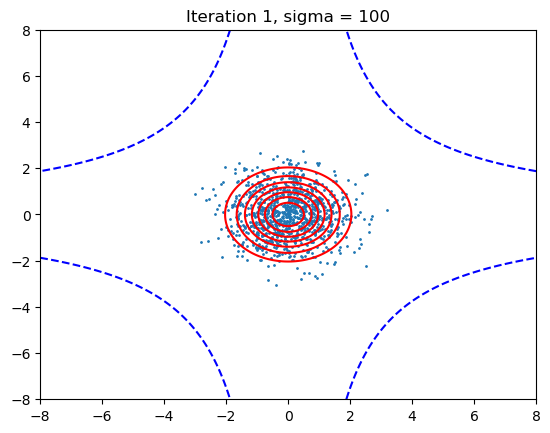

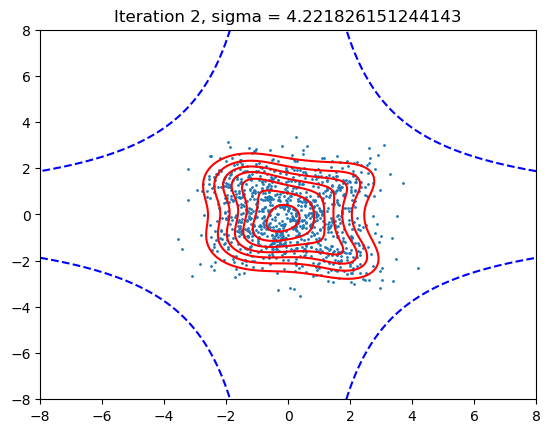

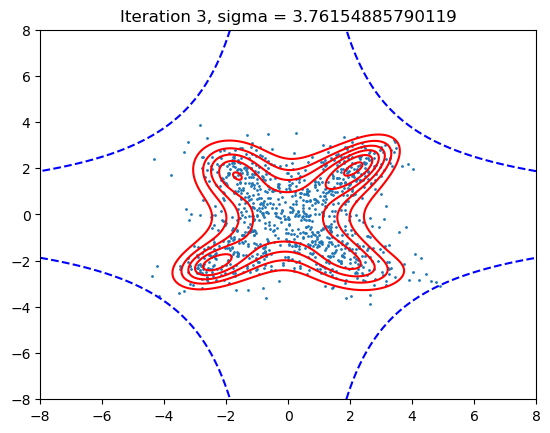

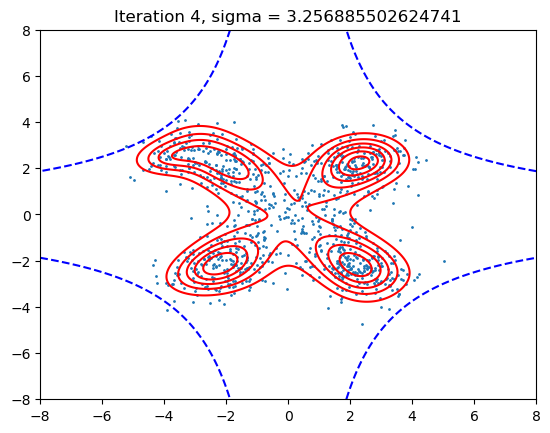

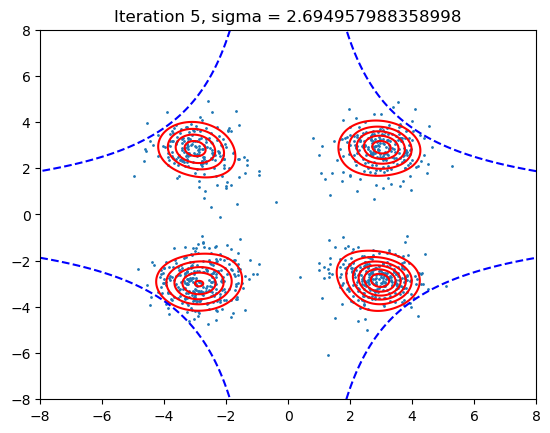

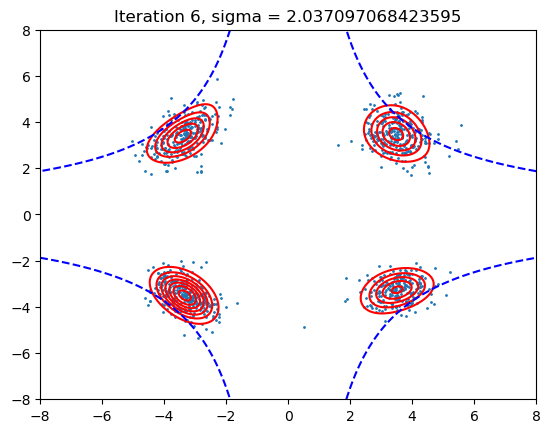

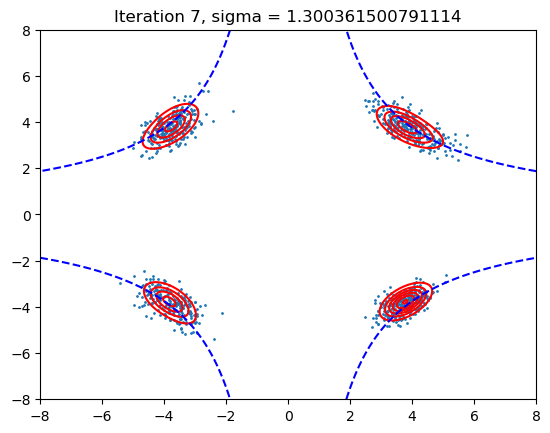

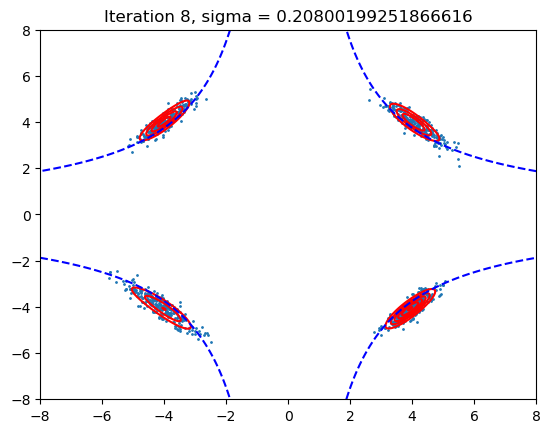

Converged after 8 iterations.


In [6]:
""" Fit iCE-NGM with fixed stopping criterion. """
ice_ngm = ImprovedCEAISNonparametricGaussianMixture(limit_state_func=limit_state_func, input_density=input_density)
# for NGM, delta_target is set to 0.6 since it is achievable. At each iteration, we plot the contour of the importance distribution and its samples.
ice_ngm.fit(max_iter=100, samples_per_level=1000, delta_target=0.6, plot_process=True)

In [7]:
""" Predict the failure probability with N=3000 samples. """
pf_ngm = ice_ngm.predict(N=5000)
print(f"Failure probability estimated by iCE-NGM with fixed stopping criterion: {pf_ngm}")
print(f"Relative error: {(pf_ngm - pf_true) / pf_true}")

Failure probability estimated by iCE-NGM with fixed stopping criterion: 5.991265653729625e-08
Relative error: -0.033666830043608854


## iCE-NGM with budget-informed stopping criterion
We fit the iCE-NGM with budget-informed stopping criterion and estimate the failure probability with remaining samples.

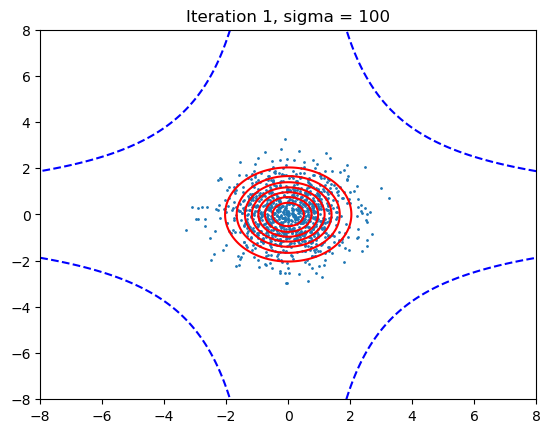

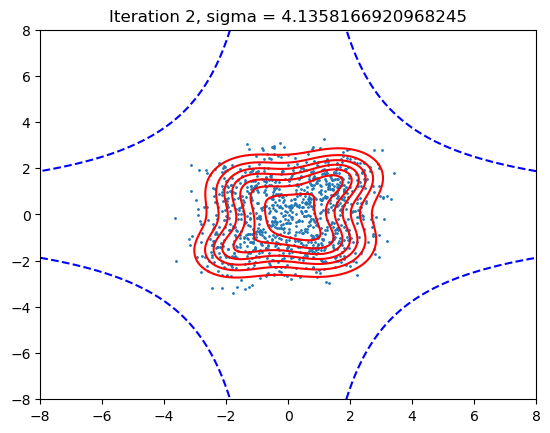

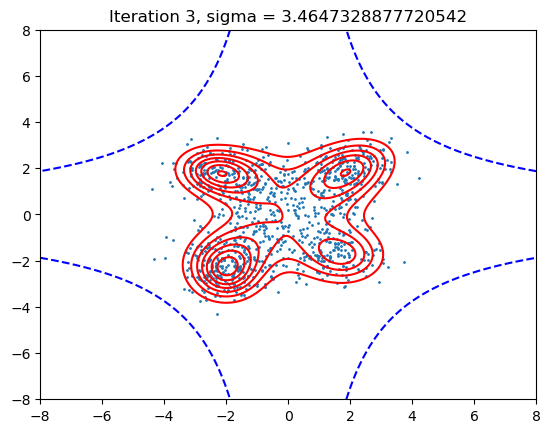

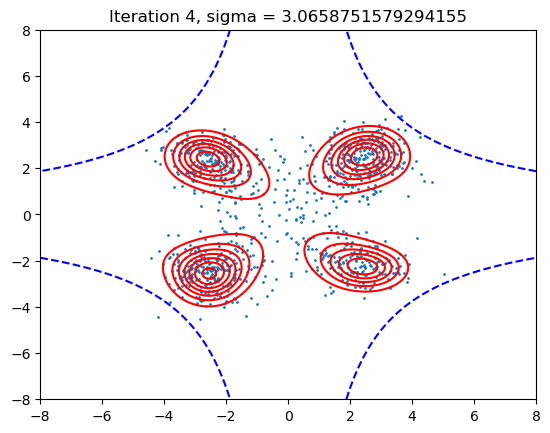

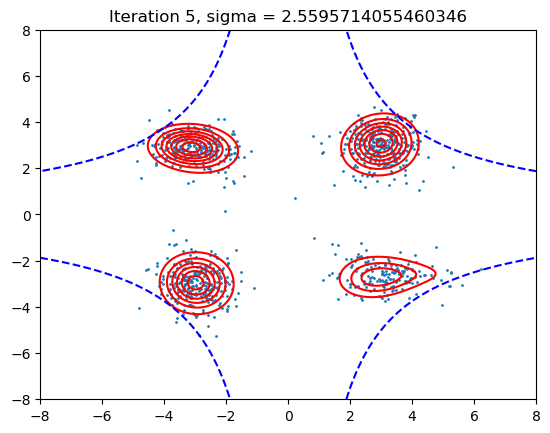

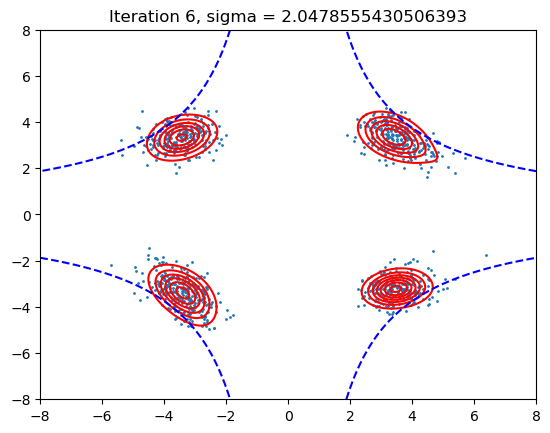

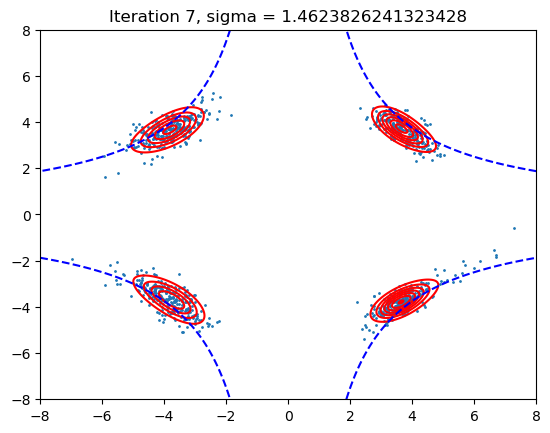

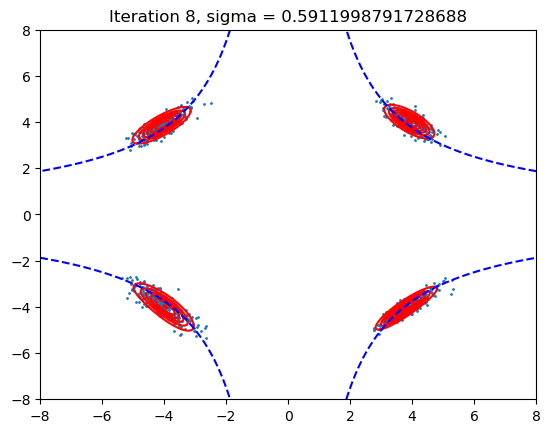

Converged after 8 iterations.


In [8]:
""" Fit iCE-NGM with budget-informed stopping criterion. """
ice_ngm_budget = ImprovedCEAISNonparametricGaussianMixture(limit_state_func=limit_state_func, input_density=input_density)
# total sample budget is set to 10000 and delta_upper_bound is set to 1 to prevent premature stopping. At each iteration, we plot the contour of the importance distribution and its samples.
ice_ngm_budget.fit_with_budget(max_iter=100, samples_per_level=1000, sample_budget=int(2e4), plot_process=True,
                               delta_target=0, delta_upper_bound=1)

Failure probability estimated by iCE-NGM with budget-informed stopping criterion: 6.027963838471796e-08
Relative error: -0.027747767988419953


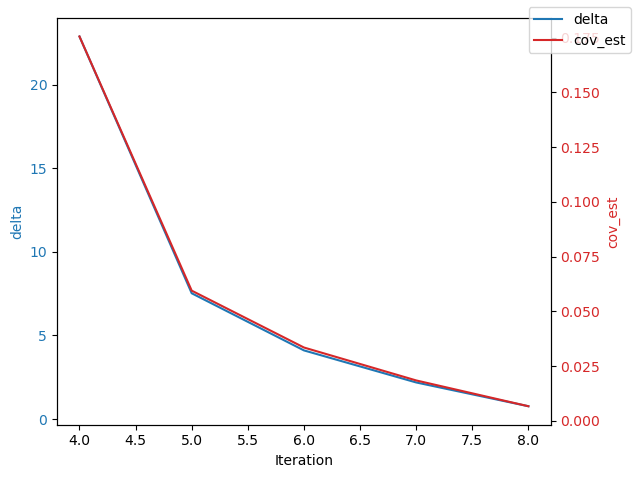

In [9]:
""" Predict the failure probability with remaining samples. """
pf_ngm_budget = ice_ngm_budget.predict_with_budget()
print(f"Failure probability estimated by iCE-NGM with budget-informed stopping criterion: {pf_ngm_budget}")
print(f"Relative error: {(pf_ngm_budget - pf_true) / pf_true}")
# plot the convergence process.
ice_ngm_budget.plot_convergence()